In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
from sklearn.svm import LinearSVC, LinearSVR
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
import statsmodels.api as sm

ModuleNotFoundError: No module named 'statsmodels'

In [3]:
df = pd.read_pickle("../data/df_kappa.pickle")
df.head()

,kappa,node,edge
0,16.758163,471,2003
1,18.356171,487,2194
2,23.953381,514,2863
3,15.620315,470,1867
4,18.657366,495,2230


In [111]:
# dfにtimestampという列を追加
# timestampには、2020-04-01から2023-09-30までの日付が入る
df["timestamp"] = pd.date_range(start="2020-04-01", end="2023-09-21", freq="D")

In [112]:
df.head()

,kappa,node,edge,timestamp
0,16.758163,471,2003,2020-04-01
1,18.356171,487,2194,2020-04-02
2,23.953381,514,2863,2020-04-03
3,15.620315,470,1867,2020-04-04
4,18.657366,495,2230,2020-04-05


<Axes: xlabel='kappa', ylabel='edge'>

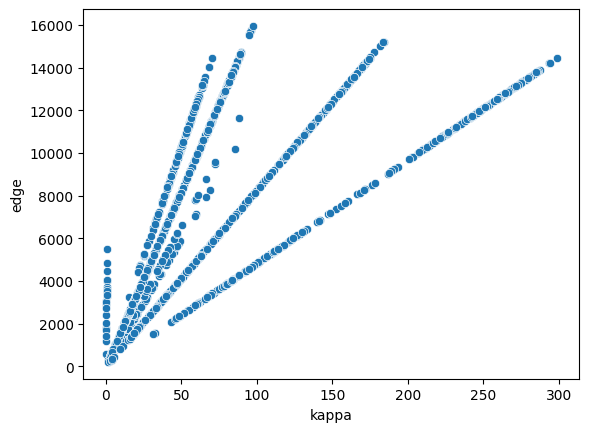

In [4]:
# 可視化
# kappaと各変数の散布図
# sns.scatterplot(x=df["kappa"], y=df["node"])
sns.scatterplot(x=df["kappa"], y=df["edge"])

In [44]:
X = df["node"].values.reshape(-1, 1)
y = df["kappa"]

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## 線形回帰

In [46]:
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [47]:
print("lr.coef_: {}".format(reg.coef_))
print("lr.intercept_: {}".format(reg.intercept_))

lr.coef_: [0.58309325]
lr.intercept_: -265.25501969754794


In [48]:
print("Training set score: {:.2f}".format(reg.score(X_train, y_train)))
print("Test set score: {:.2f}".format(reg.score(X_test, y_test)))

Training set score: 0.71
Test set score: 0.72


## リッジ回帰

In [49]:
from sklearn.linear_model import Ridge

In [50]:
ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.71
Test set score: 0.72


In [51]:
# alpha=10とする
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.71
Test set score: 0.72


In [52]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.71
Test set score: 0.72


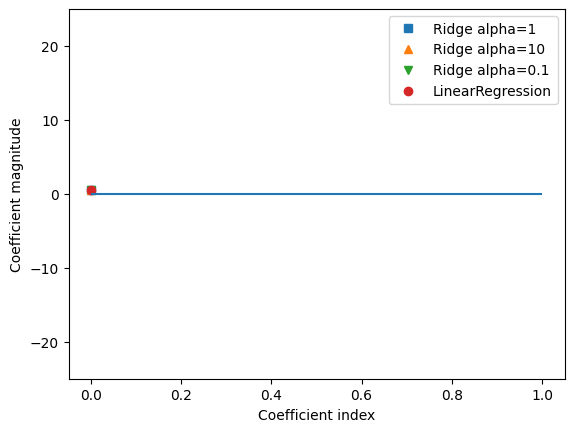

In [53]:
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(reg.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(reg.coef_))
plt.ylim(-25, 25)
plt.legend()
plt.show()

## linear support vector machines
線形サポートベクトルマシン

In [99]:
X = df[['node', 'edge']].values
y = df['kappa'].values

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [76]:
clf = svm.SVR(kernel='linear', C=1).fit(X_train, y_train)

In [77]:
y_pred = clf.predict(X_test)

In [78]:
print("Mean squared error: {:.2f}".format(mean_squared_error(y_test, y_pred)))

Mean squared error: 1909.17


## データ変換の適用

In [93]:
# データ変換の適用
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [94]:
X_train_scaled = scaler.transform(X_train)

print("transformed shape: {}".format(X_train_scaled.shape))
print("per-feature minimum before scaling:\n {}".format(X_train.min(axis=0)))
print("per-feature maximum before scaling:\n {}".format(X_train.max(axis=0)))
print("per-feature minimum after scaling:\n {}".format(X_train_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n {}".format(X_train_scaled.max(axis=0)))

transformed shape: (1015, 2)
per-feature minimum before scaling:
 [178 209]
per-feature maximum before scaling:
 [  823 15754]
per-feature minimum after scaling:
 [0. 0.]
per-feature maximum after scaling:
 [1. 1.]


In [95]:
X_test_scaled = scaler.transform(X_test)
print("per-feature minimum after scaling:\n{}".format(X_test_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n{}".format(X_test_scaled.max(axis=0)))

per-feature minimum after scaling:
[0.05891473 0.00598263]
per-feature maximum after scaling:
[0.97209302 1.01331618]


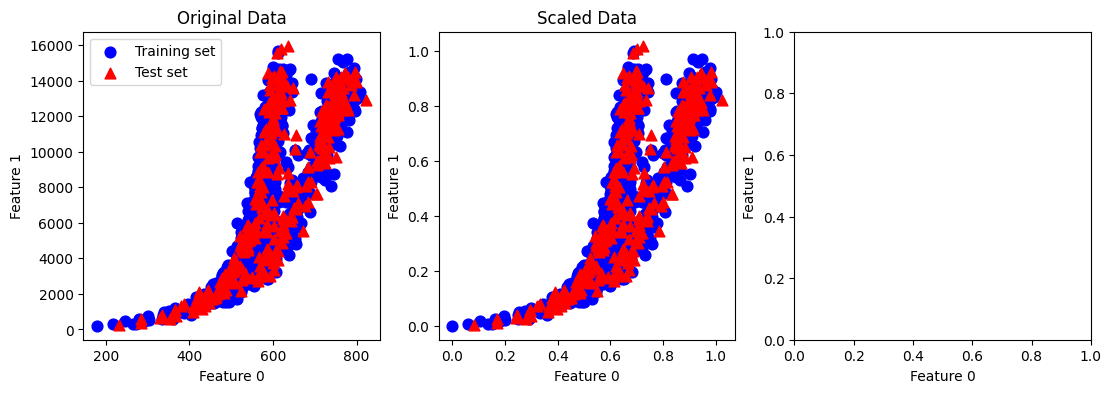

In [96]:
X_train, X_test = train_test_split(X, random_state=0)

fig, axes = plt.subplots(1, 3, figsize=(13, 4))
axes[0].scatter(X_train[:, 0], X_train[:, 1],
                c='b', label="Training set", s=60)

axes[0].scatter(X_test[:, 0], X_test[:, 1], marker='^',
                c='r', label="Test set", s=60)

axes[0].legend(loc='upper left')

axes[0].set_title("Original Data")

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                c='b', label="Training set", s=60)

axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], marker='^',
                c='r', label="Test set", s=60)

axes[1].set_title("Scaled Data")

for ax in axes:
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")

## データのプロット

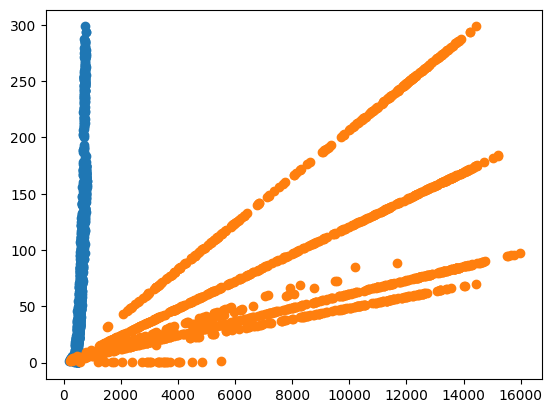

In [102]:
plt.plot(X, y, 'o')
plt.show()

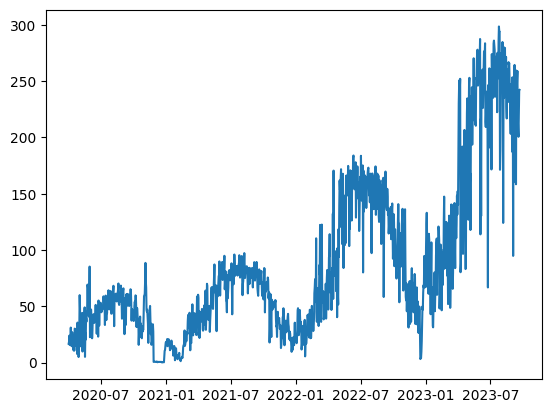

In [114]:
# kappaをプロットする
plt.plot(df["timestamp"], df["kappa"])

In [ ]:
kappa_diff = df["kappa"].diff()

## サンプルデータセットを使って線形SVCを使用する

In [65]:
from sklearn import datasets

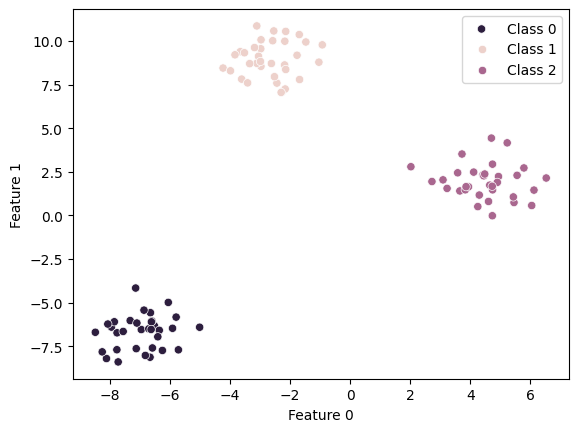

In [66]:
X, y = datasets.make_blobs(random_state=42)
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])
plt.show()

In [67]:
linear_svm = LinearSVC().fit(X, y)
print("Coefficient shape: ", linear_svm.coef_.shape)
print("Intercept shape: ", linear_svm.intercept_.shape)

Coefficient shape:  (3, 2)
Intercept shape:  (3,)


/Users/yiadka/dev/master_ver2/venv/lib/python3.9/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


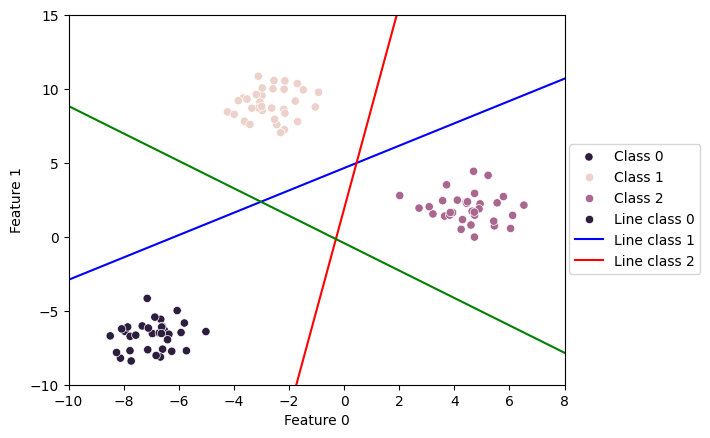

In [71]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, ['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2", "Line class 0", "Line class 1", "Line class 2"], loc=(1.01, 0.3))